In [96]:
# import necessary modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

%run utils/stat_helper_functions

In [97]:
# read file
path = '/Users/mehipour/Desktop/data/'
file_path = path + 'R_lung_data_28-Aug-2020.csv'
df = pd.read_csv(file_path)

# remove space from column names and values
df.columns = df.columns.str.lstrip()
df['cohort'] = df['cohort'].str.lstrip()

# reivew data
df.head()


,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total
0,20,Perfused,38.8500,166291.4799,0.6220,2.9609,994067.4225,1.0000,1.0000
1,20,Perfused,89.4167,125845.1754,0.6577,1.6674,796745.1180,1.3439,0.9442
2,20,Perfused,107.7833,117877.2938,0.6413,1.5809,739123.2669,1.3277,0.9534
3,20,Perfused,125.0500,96209.7996,0.5828,1.5373,741741.0662,1.1143,0.7754
4,20,Perfused,142.5333,103029.6433,0.6083,1.3840,780196.8626,1.3255,0.7894


In [102]:
# apply linear regression for each rat
lm = LinearRegression()

# get weights
rats = df['rat'].unique()
df_summary = pd.DataFrame(columns=['cohort', 'slope', 'intercept'], index=rats)

for rat in rats:
    df_rat = df[df['rat'] == rat]
    t_hr = df_rat['t_min'].values.reshape(-1,1)/60
    y = df_rat['atp2total'].values.reshape(-1,1)
    lm.fit(t_hr,y)
    cohort = df[df['rat']==rat]['cohort'].unique()[0]
    df_summary.loc[rat] = [cohort, -lm.coef_[0][0], lm.intercept_[0]] 
df_summary.head()

,cohort,slope,intercept
20,Perfused,0.120313,1.10378
21,Perfused,0.0641586,1.03491
22,Perfused,0.0524585,1.00217
23,Cold,0.0383492,1.05487
24,Cold,0.180772,1.19819


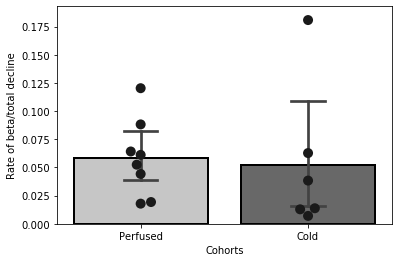

In [104]:
# show lac2pyr barplots
ax = sns.barplot(x='cohort', y='slope', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()